In [1]:
#importing libraries needed
import pandas as pd
import numpy as np
#To plot required plots for the analysis
from matplotlib import pyplot as plt
import seaborn as sns
#To avoid any warnings in the middle importing warnings
import warnings
warnings.filterwarnings('ignore')
#To perform statistical tests
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
#To perform regression
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
import sklearn.metrics as metrics
# Import Ridge regression module
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
# Importing Lasso module
from sklearn.linear_model import Lasso

In [2]:
#Reads the data from csv file
house_data=pd.read_csv('train.csv')
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#Finding shape of the dataframe
house_data.shape

(1460, 81)

In [4]:
#To know the info of the dataframe
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
house_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Data Cleaning

In [6]:
#checking the percentage of missing values in dataframe
round((house_data[house_data.columns[house_data.isnull().any()]].isnull().sum()/len(house_data))*100,2).sort_values(ascending=False)

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
dtype: float64

We can observe that these 19 coulmns has null values. Mainly PoolQC, MiscFeature, Alley, Fence and FireplaceQu have very high percentage of missing value.

#### Handling missing values 

We can handle missing values of categorical variables. we can replace missing values as not present.

In [7]:
# Replacing missing values with 'Not Present' for below columns
Categorical_nan_cols= ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual','MasVnrType']
house_data[Categorical_nan_cols]= house_data[Categorical_nan_cols].fillna('Not Present')

In [8]:
#checking the percentage of missing values in dataframe
round((house_data[house_data.columns[house_data.isnull().any()]].isnull().sum()/len(house_data))*100,2).sort_values(ascending=False)

LotFrontage    17.74
GarageYrBlt     5.55
MasVnrArea      0.55
Electrical      0.07
dtype: float64

In [9]:
# We can see that LotFrontage column has 17.74% missing values
# Let's see the distribution of the value of the LotFrontage column
house_data['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [10]:
# Imputing missing values of LotFrontage with median
house_data.loc[np.isnan(house_data['LotFrontage']), 'LotFrontage'] = house_data['LotFrontage'].median()

In [11]:
# We can see that GarageYrBlt column has 5.55% missing values
# Let's see the distribution of the value of the GarageYrBlt column
house_data['GarageYrBlt'].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [12]:
# Imputing missing values of GarageYrBlt with median
house_data.loc[np.isnan(house_data['GarageYrBlt']), 'GarageYrBlt'] = house_data['GarageYrBlt'].median()


In [13]:
# We can see that MasVnrArea column has 0.55% missing values
# Let's see the distribution of the value of the MasVnrArea column
house_data['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [14]:
# Imputing missing values of MasVnrArea with median
house_data.loc[np.isnan(house_data['MasVnrArea']), 'MasVnrArea'] = house_data['MasVnrArea'].median()

In [15]:
# We can see that Electrical column has 0.07% missing values
# Let's see the distribution of the value of the Electrical column
house_data['Electrical'].describe()

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

In [16]:
#Removing the rows of electrical column
house_data = house_data.dropna(axis=0, subset=['Electrical'])
house_data.shape

(1459, 81)

In [17]:
#checking the percentage of missing values in dataframe
round((house_data[house_data.columns[house_data.isnull().any()]].isnull().sum()/len(house_data))*100,2).sort_values(ascending=False)

Series([], dtype: float64)

In [18]:
numeric_house_data = house_data.select_dtypes(include=['float64', 'int64'])
numeric_house_data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [19]:
# Removing ID coulmn as it was unnecessary
house_data = house_data.drop(['Id'], axis=1)

### EDA

As per the target variable we will perform some EDA on data

<AxesSubplot:xlabel='OverallCond', ylabel='SalePrice'>

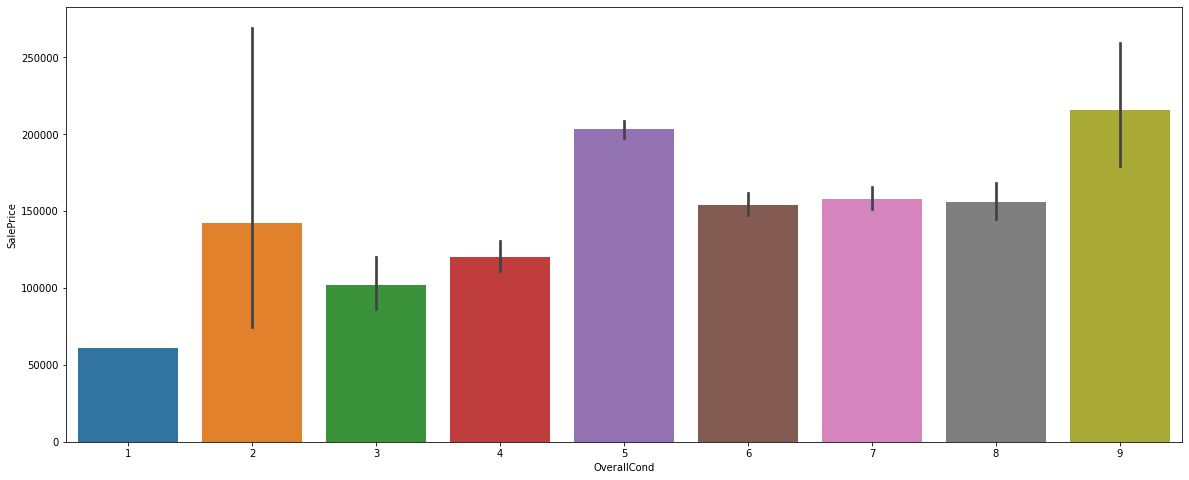

In [20]:
# plot 'overall condition' with respect to 'Saleprice'

plt.figure(figsize=(20, 8))
sns.barplot(x="OverallCond", y="SalePrice", data= house_data)

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

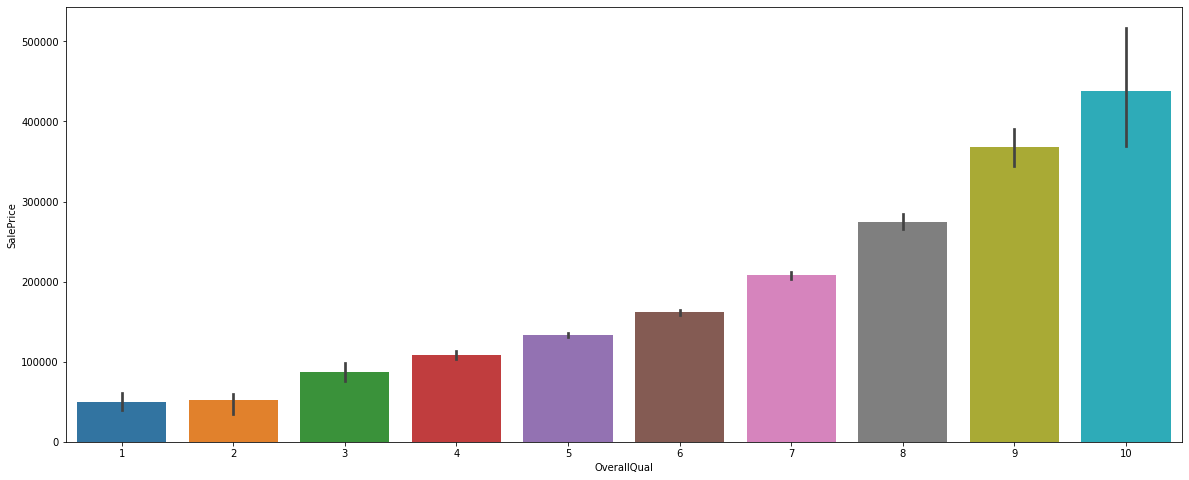

In [21]:
# plot 'overall quality' with respect to 'Saleprice'

plt.figure(figsize=(20, 8))
sns.barplot(x="OverallQual", y="SalePrice", data= house_data)

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

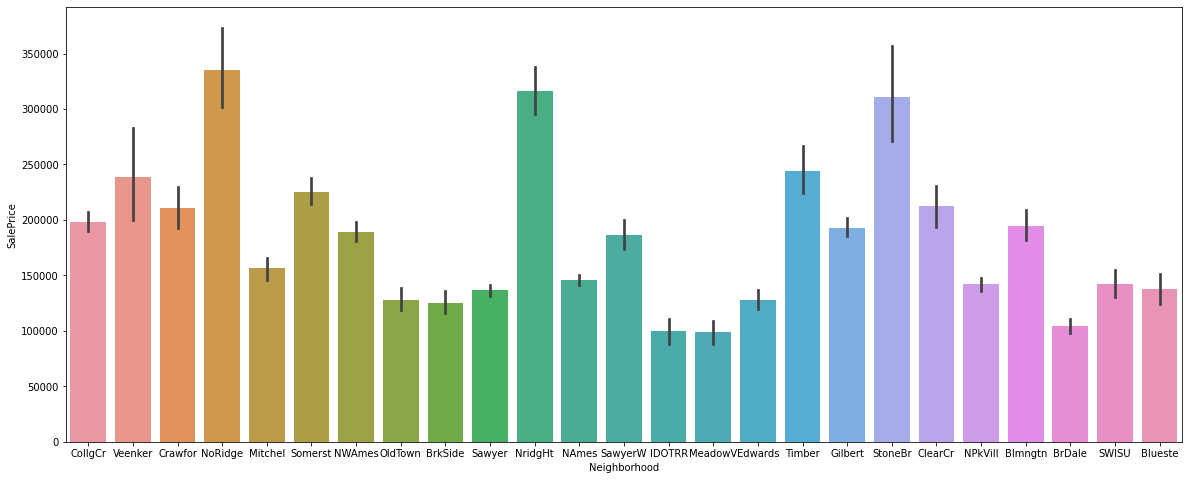

In [22]:
# plot 'Sale Price' with respect to 'Neighborhood'

plt.figure(figsize=(20, 8))
sns.barplot(x="Neighborhood", y="SalePrice", data= house_data)

We can observe that The neighnorhood which has NoRidge, NridgHt,StoneBr has high salesproce compared to others.

<AxesSubplot:xlabel='MSZoning', ylabel='SalePrice'>

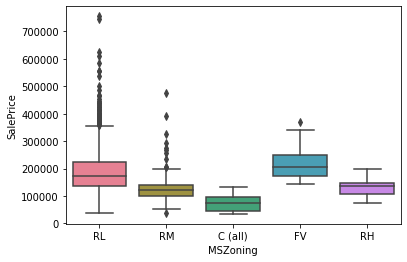

In [23]:
# plot 'Sale Price' with respect to 'MSZoning'
sns.boxplot(x=house_data['MSZoning'], y=house_data['SalePrice'], palette=("husl"))

<AxesSubplot:xlabel='Street', ylabel='SalePrice'>

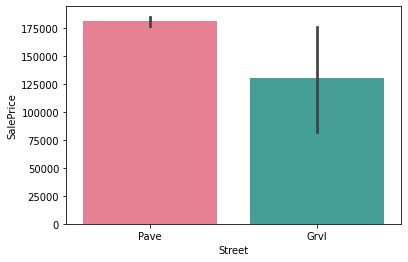

In [24]:
sns.barplot(x=house_data['Street'], y=house_data['SalePrice'], palette=("husl"))

we can observe that Pave has high saleprice compared to Grvl

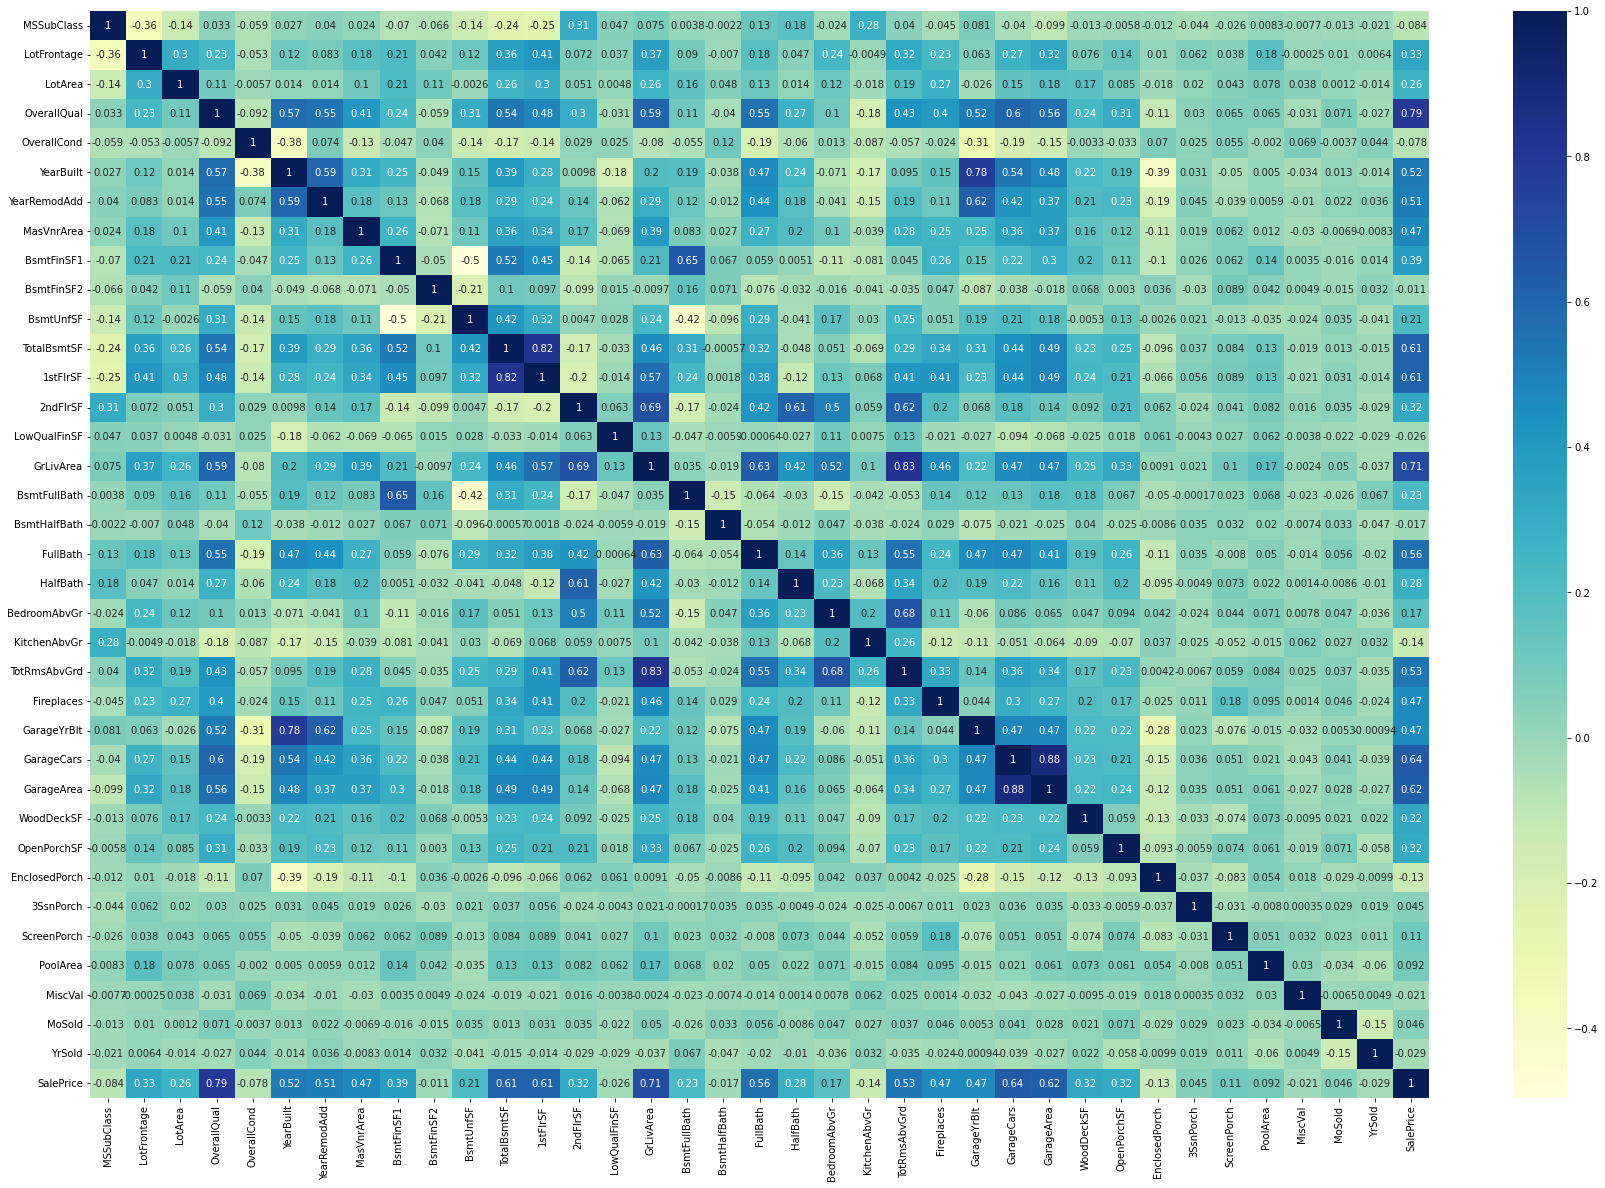

In [25]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(30,20))

# heatmap
sns.heatmap(house_data.corr(), cmap="YlGnBu", annot=True)
plt.show()

We can observe that some of the variables are correlated.

##### Analysis based on Target variable

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

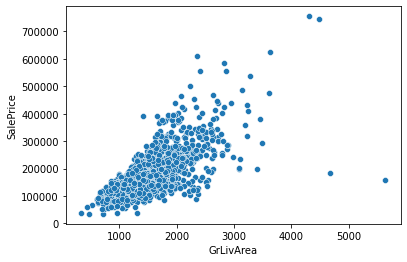

In [26]:
sns.scatterplot(x =house_data['GrLivArea'], y =house_data['SalePrice'], data = house_data)

we can observe some outliers in the data.

In [27]:
#OUTLIER TREATMENT

def remove_outliers(a,b):
    q1 = a[b].quantile(0.25)
    q3 = a[b].quantile(0.75)
    value = q3-q1
    lower_value  = q1-1.5*value
    higer_value = q3+1.5*value
    out= a[(a[b]<higer_value) & (a[b]>lower_value)]
    return out

In [28]:
house_data = remove_outliers(house_data,'GrLivArea')

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

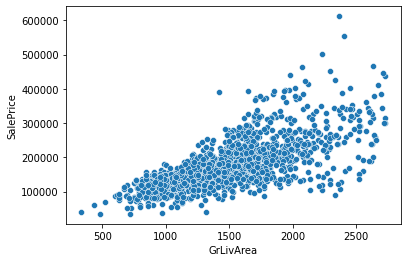

In [29]:
#After removal of outliers
sns.scatterplot(x =house_data['GrLivArea'], y =house_data['SalePrice'], data = house_data)

<AxesSubplot:xlabel='LotFrontage', ylabel='SalePrice'>

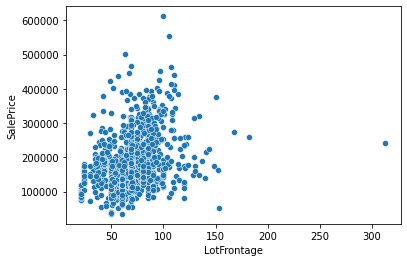

In [30]:
#plot using LotFrontage and salesprice
sns.scatterplot(x =house_data['LotFrontage'], y =house_data['SalePrice'], data = house_data)

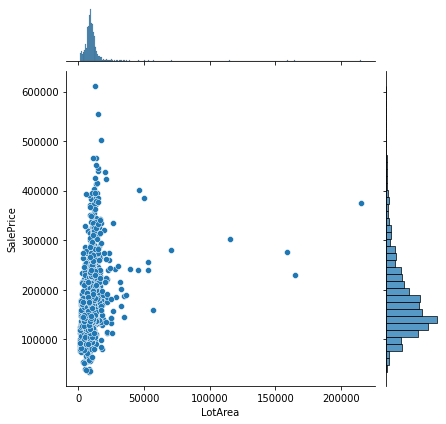

In [31]:
#plot using LotArea and salesprice
sns.jointplot(x = house_data['LotArea'], y = house_data['SalePrice'])

In [32]:
#As we can observe some outliers in LotArea varaible removing outliers from that column
house_data = remove_outliers(house_data,'LotArea')

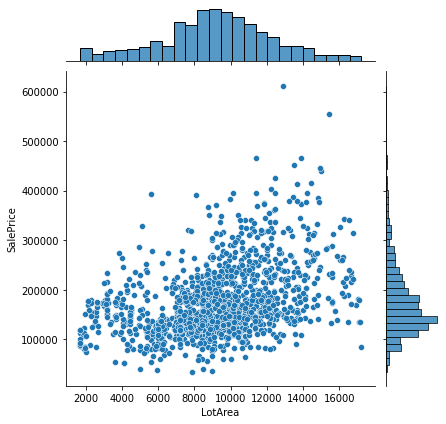

In [33]:
#After removal of outliers
sns.jointplot(x = house_data['LotArea'], y = house_data['SalePrice'])

#### Deriving new coulmn age of the house

In [34]:
house_data['Age_House'] = house_data['YrSold'] - house_data['YearBuilt']
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Age_House
0,60,RL,65.0,8450,Pave,Not Present,Reg,Lvl,AllPub,Inside,...,Not Present,Not Present,Not Present,0,2,2008,WD,Normal,208500,5
1,20,RL,80.0,9600,Pave,Not Present,Reg,Lvl,AllPub,FR2,...,Not Present,Not Present,Not Present,0,5,2007,WD,Normal,181500,31
2,60,RL,68.0,11250,Pave,Not Present,IR1,Lvl,AllPub,Inside,...,Not Present,Not Present,Not Present,0,9,2008,WD,Normal,223500,7
3,70,RL,60.0,9550,Pave,Not Present,IR1,Lvl,AllPub,Corner,...,Not Present,Not Present,Not Present,0,2,2006,WD,Abnorml,140000,91
4,60,RL,84.0,14260,Pave,Not Present,IR1,Lvl,AllPub,FR2,...,Not Present,Not Present,Not Present,0,12,2008,WD,Normal,250000,8


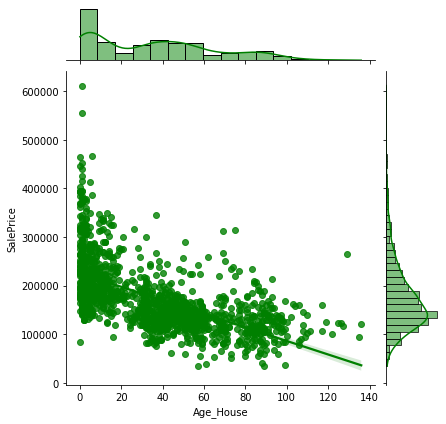

In [35]:
sns.jointplot(x=house_data['Age_House'],y=house_data['SalePrice'],kind="reg",color="g")

We can observe from the plot like if age of the house increases price was decreasing.

#### Preparation of Data

In [36]:
#As we have derived age of the house so removing YrSold and YearBuilt
#Removing values which are correlated and it was not necessary based on target variable

house_data = house_data.drop(['YrSold'], axis = 1)
house_data = house_data.drop(['YearBuilt'], axis = 1)
house_data = house_data.drop(['GarageCars'], axis = 1)
house_data = house_data.drop(['BsmtUnfSF'], axis = 1)
house_data = house_data.drop(['GarageYrBlt'], axis = 1)
house_data = house_data.drop(['YearRemodAdd'], axis = 1)
house_data = house_data.drop(['MoSold'], axis = 1)  

house_data.shape

(1356, 74)

In [37]:
numerical_columns= house_data.select_dtypes(include=['float64', 'int64'])
numerical_columns

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,Age_House
0,60,65.0,8450,7,5,196.0,706,0,856,856,...,548,0,61,0,0,0,0,0,208500,5
1,20,80.0,9600,6,8,0.0,978,0,1262,1262,...,460,298,0,0,0,0,0,0,181500,31
2,60,68.0,11250,7,5,162.0,486,0,920,920,...,608,0,42,0,0,0,0,0,223500,7
3,70,60.0,9550,7,5,0.0,216,0,756,961,...,642,0,35,272,0,0,0,0,140000,91
4,60,84.0,14260,8,5,350.0,655,0,1145,1145,...,836,192,84,0,0,0,0,0,250000,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,0.0,0,0,953,953,...,460,0,40,0,0,0,0,0,175000,8
1456,20,85.0,13175,6,6,119.0,790,163,1542,2073,...,500,349,0,0,0,0,0,0,210000,32
1457,70,66.0,9042,7,9,0.0,275,0,1152,1188,...,252,0,60,0,0,0,0,2500,266500,69
1458,20,68.0,9717,5,6,0.0,49,1029,1078,1078,...,240,366,0,112,0,0,0,0,142125,60


In [38]:
#Finding varinace of the columns
for i in numerical_columns:
    print(house_data[i].value_counts())

20     505
60     268
50     134
120     87
30      67
160     61
70      55
80      52
90      50
190     26
85      20
45      12
75      11
180      5
40       3
Name: MSSubClass, dtype: int64
69.0     237
60.0     140
70.0      70
80.0      67
50.0      56
        ... 
106.0      1
38.0       1
33.0       1
182.0      1
149.0      1
Name: LotFrontage, Length: 99, dtype: int64
7200     25
9600     24
6000     17
9000     14
8400     14
         ..
9453      1
9450      1
15593     1
7399      1
7150      1
Name: LotArea, Length: 976, dtype: int64
5     375
6     352
7     297
8     154
4     107
9      37
3      19
10     10
2       3
1       2
Name: OverallQual, dtype: int64
5    768
6    238
7    189
8     68
4     48
3     23
9     16
2      5
1      1
Name: OverallCond, dtype: int64
0.0       807
72.0        8
180.0       8
108.0       8
16.0        7
         ... 
573.0       1
1047.0      1
975.0       1
415.0       1
258.0       1
Name: MasVnrArea, Length: 305, dtype: int64
0

In [39]:
house_data.drop(['Street','Alley','LandContour','Utilities','LandSlope','Condition2','BldgType','RoofMatl','BsmtCond','Heating',
         'CentralAir','Electrical','Functional','GarageQual','GarageCond','PavedDrive','PoolQC','MiscFeature','SaleType','ExterCond','BsmtFinType2'],
       axis=1, inplace=True)

In [40]:
house_data.shape

(1356, 53)

Drooping the above columns due to low variance and not needed for further predection

In [41]:
#Create a list of categorical variables
categorical_cols=house_data.select_dtypes('object').columns
categorical_cols

Index(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'Condition1',
       'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'Fence', 'SaleCondition'],
      dtype='object')

Creating dummy variables using One Hot encoding method for converting categorical into numerical

In [42]:
house_data = pd.get_dummies(house_data, drop_first=True )
house_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,...,GarageFinish_Unf,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_Not Present,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,856,856,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,0,1262,1262,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,0,920,920,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,0.0,216,0,756,961,...,1,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,0,1145,1145,...,0,0,0,0,1,0,0,0,1,0


#### Splitting data in to train and test data

In [43]:
#we will split 70% data into train data and remining 30% data into test data.
house_data_train,house_data_test = train_test_split(house_data, train_size=0.7, test_size=0.3, random_state=50)

In [44]:
print(house_data_train.shape)
print(house_data_test.shape)

(949, 170)
(407, 170)


##### Using Minmax scaler to scale numerical columns for train data

In [45]:
scaler = MinMaxScaler()
num_columns=list(numerical_columns.columns)
house_data_train[num_columns] = scaler.fit_transform(house_data_train[num_columns])
house_data_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,...,GarageFinish_Unf,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_Not Present,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1269,0.176471,0.354037,0.621999,0.444444,0.428571,0.1125,0.210238,0.0,0.331941,0.234885,...,1,1,0,0,0,0,0,0,1,0
639,0.588235,0.198758,0.148162,0.777778,0.428571,0.0000,0.527422,0.0,0.577288,0.536320,...,0,0,0,0,1,0,0,0,0,1
505,0.411765,0.242236,0.380768,0.444444,0.428571,0.2250,0.000000,0.0,0.364603,0.272292,...,1,0,0,0,1,0,0,0,1,0
775,0.588235,0.068323,0.181502,0.555556,0.428571,0.2000,0.395795,0.0,0.457273,0.378425,...,0,0,0,0,1,0,0,0,1,0
1293,0.235294,0.354037,0.544507,0.666667,0.428571,0.0000,0.088665,0.0,0.315989,0.216616,...,0,1,0,0,0,0,0,0,1,0


In [46]:
house_data_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,...,GarageFinish_Unf,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_Not Present,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,...,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000
mean,0.214684,0.292763,0.475867,0.560941,0.513473,0.059264,0.185089,0.036086,0.385150,0.339920,...,0.414120,0.033720,0.110643,0.010537,0.800843,0.003161,0.006322,0.017914,0.822972,0.081138
std,0.242176,0.113199,0.198458,0.147639,0.160379,0.106863,0.188617,0.126975,0.148667,0.149564,...,0.492829,0.180602,0.313855,0.102163,0.399577,0.056165,0.079304,0.132707,0.381894,0.273191
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.242236,0.355281,0.444444,0.428571,0.000000,0.000000,0.000000,0.297759,0.230535,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.176471,0.298137,0.477570,0.555556,0.428571,0.000000,0.160420,0.000000,0.364223,0.311875,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.294118,0.347826,0.596254,0.666667,0.571429,0.092500,0.308044,0.000000,0.469047,0.428882,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Defining target variable and future variable for train data

In [47]:
y_train = house_data_train.pop('SalePrice')
X_train = house_data_train


##### Using Minmax scaler to scale numerical columns for train data and defining traget and future variables

In [48]:
num_columns=list(numerical_columns.columns)
house_data_test[num_columns] = scaler.fit_transform(house_data_test[num_columns])
house_data_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,...,GarageFinish_Unf,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_Not Present,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
498,0.0,0.343750,0.390866,0.444444,0.75,0.085005,0.254669,0.0,0.269495,0.216780,...,0,0,1,0,0,0,0,0,1,0
1199,0.0,0.421875,0.617240,0.333333,0.50,0.048711,0.309564,0.0,0.327823,0.468473,...,1,0,0,0,1,0,0,0,1,0
540,0.0,0.500000,0.839067,0.888889,0.50,0.557784,0.713073,0.0,0.573300,0.706097,...,0,0,0,0,1,0,0,0,1,0
947,0.0,0.500000,0.834783,0.777778,0.50,0.225406,0.735710,0.0,0.504055,0.597186,...,0,0,0,0,1,0,0,0,1,0
713,1.0,0.304688,0.527481,0.333333,0.50,0.152818,0.446520,0.0,0.299439,0.248567,...,1,0,0,0,1,0,0,0,1,0


In [49]:
y_test = house_data_test.pop('SalePrice')
X_test = house_data_test

### Model Building and Evaluation

In [50]:
#Normal linear regression
lm = LinearRegression()
# Fit the model with train set
lm.fit(X_train, y_train)


LinearRegression()

In [51]:
# Predict the model using train data
y_train_pred = lm.predict(X_train)
# r2 score for the train data
metrics.r2_score(y_true = y_train, y_pred = y_train_pred)

0.9364309121304439

In [52]:
# Predict the model using test data
y_test_pred = lm.predict(X_test)
# r2 score for the test data
metrics.r2_score(y_true = y_test, y_pred = y_test_pred)

-5.068713921887028e+18

we can observe test r2 scrore was very low.

In [53]:
#checking RFE for top 100 variables
rfe = RFE(lm, n_features_to_select=100)            
rfe = rfe.fit(X_test, y_test)
list(zip(X_test.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', True, 1),
 ('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 54),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 33),
 ('BsmtHalfBath', False, 15),
 ('FullBath', True, 1),
 ('HalfBath', False, 20),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', False, 37),
 ('Fireplaces', False, 36),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 19),
 ('OpenPorchSF', False, 25),
 ('EnclosedPorch', False, 38),
 ('3SsnPorch', True, 1),
 ('ScreenPorch', True, 1),
 ('PoolArea', True, 1),
 ('MiscVal', False, 30),
 ('Age_House', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 51),
 ('LotShape_IR3', False, 55),
 ('LotShape_Reg', False, 47),


In [54]:
# Select the top 100 variables
top_col = X_test.columns[rfe.support_]
X_test_rfe = X_test[top_col]
X_test_rfe.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GarageType_CarPort,GarageType_Detchd,GarageType_Not Present,GarageFinish_Not Present,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_Not Present,SaleCondition_AdjLand,SaleCondition_Family
498,0.0,0.343750,0.390866,0.444444,0.75,0.254669,0.0,0.269495,0.216780,0.0,...,0,0,0,0,0,1,0,0,0,0
1199,0.0,0.421875,0.617240,0.333333,0.50,0.309564,0.0,0.327823,0.468473,0.0,...,0,0,0,0,0,0,0,1,0,0
540,0.0,0.500000,0.839067,0.888889,0.50,0.713073,0.0,0.573300,0.706097,0.0,...,0,0,0,0,0,0,0,1,0,0
947,0.0,0.500000,0.834783,0.777778,0.50,0.735710,0.0,0.504055,0.597186,0.0,...,0,0,0,0,0,0,0,1,0,0
713,1.0,0.304688,0.527481,0.333333,0.50,0.446520,0.0,0.299439,0.248567,0.0,...,0,1,0,0,0,0,0,1,0,0


### Ridge and Lasso Regression

#### Ridge Regression

In [55]:
# Ridge regression
ridge = Ridge()
# List the range of hyperparameters (alpha)
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]}

In [56]:
# cross validation with 5 folds
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 23 candidates, totalling 115 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [57]:
# creating dataframe with ridge outputs
ridge_res = pd.DataFrame(model_cv.cv_results_)
ridge_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.024646,0.005532,0.012445,0.002133,0.0001,{'alpha': 0.0001},0.911004,0.907235,0.900800,0.852333,...,0.895400,0.021781,23,0.936217,0.938079,0.940222,0.945953,0.937384,0.939571,0.003447
1,0.013580,0.006894,0.008424,0.007073,0.001,{'alpha': 0.001},0.911021,0.907253,0.900824,0.852590,...,0.895470,0.021688,22,0.936217,0.938079,0.940222,0.945953,0.937384,0.939571,0.003447
2,0.012809,0.006415,0.005379,0.006938,0.01,{'alpha': 0.01},0.911184,0.907426,0.901062,0.854750,...,0.896082,0.020919,21,0.936216,0.938078,0.940221,0.945949,0.937383,0.939569,0.003446
3,0.016232,0.003999,0.011628,0.005160,0.05,{'alpha': 0.05},0.911830,0.908111,0.901972,0.859876,...,0.897778,0.019211,19,0.936197,0.938063,0.940203,0.945893,0.937357,0.939543,0.003433
4,0.016092,0.000583,0.007382,0.009214,0.1,{'alpha': 0.1},0.912499,0.908839,0.902865,0.862827,...,0.899015,0.018354,17,0.936148,0.938024,0.940157,0.945801,0.937301,0.939486,0.003417


##### Plotting mean test and train results with alpha 

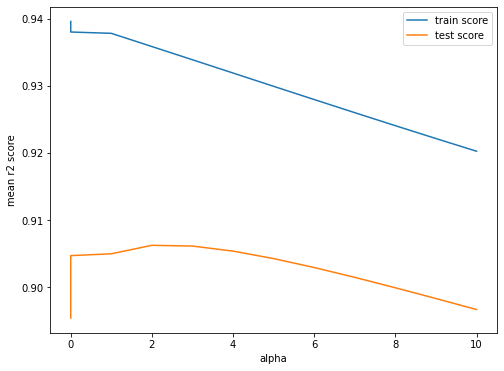

In [58]:
ridge_res['param_alpha'] = ridge_res['param_alpha'].astype('int32')
# Train
plt.figure(figsize=(8,6))
plt.plot(ridge_res['param_alpha'], ridge_res['mean_train_score'])
# Test
plt.plot(ridge_res['param_alpha'], ridge_res['mean_test_score'])
plt.legend(['train score', 'test score'])
plt.xlabel('alpha')
plt.ylabel('mean r2 score')
plt.show()

Train

We have observed that if alpha  increases, the mean r2 score decreases.

Test

We have observed that if the alpha increases from alpha =2, the mean r2 score increases.
So we will choose alpha=2 for further analysis

In [59]:
model_ridge = Ridge(alpha=2)
# Fitting the model with the train set
model_ridge.fit(X_train, y_train)
model_ridge.coef_

array([-3.71329622e-02,  2.59490298e-02,  3.82000508e-02,  9.13314250e-02,
        6.46419819e-02,  2.90532240e-02,  7.03915305e-02,  9.24886657e-03,
        7.58872514e-02,  6.07050397e-02,  4.53507884e-02, -1.30965597e-02,
        8.64674329e-02,  1.16513447e-02, -6.00544994e-03,  3.22366191e-02,
        1.75949610e-02, -2.86028665e-02, -1.80357811e-02,  3.90086963e-02,
        2.16484170e-02,  5.04119005e-02,  1.71745173e-02,  1.04694260e-02,
        1.12033003e-02,  1.41629396e-02,  9.71523297e-03,  1.93618293e-02,
        1.31472809e-03, -5.04314979e-02,  3.83921976e-02,  1.33611011e-02,
        2.24973711e-02,  1.43500009e-02,  3.03860824e-03, -5.08866208e-03,
        8.97229792e-05,  8.89212163e-03, -8.40610681e-03, -1.00487206e-02,
       -2.39453780e-03,  8.19048015e-03,  5.78194391e-03,  6.49155611e-03,
       -1.51035343e-02, -1.16667755e-02,  2.64113129e-02, -2.63028662e-02,
       -1.81238872e-02, -1.68159200e-02, -4.42107151e-03, -2.27616410e-02,
       -2.06493992e-02,  

#### Model evaluation using Ridge

In [60]:
#On train data
y_train_pred = model_ridge.predict(X_train)
print(metrics.r2_score(y_true = y_train, y_pred = y_train_pred))

0.9338573956978723


In [61]:
#on test data
y_test_pred = model_ridge.predict(X_test)
print(metrics.r2_score(y_true = y_test, y_pred = y_test_pred))

0.9168089469736156


In [62]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.04035242711079925


In [63]:
MSE = np.square(np.subtract(y_test, y_test_pred)).mean()
MSE

0.001628318373732367

In [64]:
# Coefficients list
model_ridge_parameters = list(model_ridge.coef_)
# Inserting Y Intercept to model parameters list
model_ridge_parameters.insert(0, model_ridge.intercept_)
# Rounding off the coefficients
model_ridge_parameters = [round(i,3) for i in model_ridge_parameters]

cols = X_train.columns
cols = cols.insert(0,'constant')
ridge_param_list = list(zip(cols, model_ridge_parameters))
ridge_param_list

[('constant', 0.02),
 ('MSSubClass', -0.037),
 ('LotFrontage', 0.026),
 ('LotArea', 0.038),
 ('OverallQual', 0.091),
 ('OverallCond', 0.065),
 ('MasVnrArea', 0.029),
 ('BsmtFinSF1', 0.07),
 ('BsmtFinSF2', 0.009),
 ('TotalBsmtSF', 0.076),
 ('1stFlrSF', 0.061),
 ('2ndFlrSF', 0.045),
 ('LowQualFinSF', -0.013),
 ('GrLivArea', 0.086),
 ('BsmtFullBath', 0.012),
 ('BsmtHalfBath', -0.006),
 ('FullBath', 0.032),
 ('HalfBath', 0.018),
 ('BedroomAbvGr', -0.029),
 ('KitchenAbvGr', -0.018),
 ('TotRmsAbvGrd', 0.039),
 ('Fireplaces', 0.022),
 ('GarageArea', 0.05),
 ('WoodDeckSF', 0.017),
 ('OpenPorchSF', 0.01),
 ('EnclosedPorch', 0.011),
 ('3SsnPorch', 0.014),
 ('ScreenPorch', 0.01),
 ('PoolArea', 0.019),
 ('MiscVal', 0.001),
 ('Age_House', -0.05),
 ('MSZoning_FV', 0.038),
 ('MSZoning_RH', 0.013),
 ('MSZoning_RL', 0.022),
 ('MSZoning_RM', 0.014),
 ('LotShape_IR2', 0.003),
 ('LotShape_IR3', -0.005),
 ('LotShape_Reg', 0.0),
 ('LotConfig_CulDSac', 0.009),
 ('LotConfig_FR2', -0.008),
 ('LotConfig_FR3', -

In [65]:
ridge_params_df = pd.DataFrame({'Params':cols, 'Coef':model_ridge_parameters})
(ridge_params_df.sort_values('Coef', ascending=False)).head(10)

,Params,Coef
4,OverallQual,0.091
13,GrLivArea,0.086
9,TotalBsmtSF,0.076
7,BsmtFinSF1,0.070
5,OverallCond,0.065
10,1stFlrSF,0.061
63,Neighborhood_StoneBr,0.054
22,GarageArea,0.050
56,Neighborhood_NoRidge,0.049
11,2ndFlrSF,0.045


### Lasso Regression

In [66]:
params = {'alpha': [0.000001,0.00001,0.0001,0.001, 0.01, 1.0,2]}
# Instantiate Lasso regression
lasso = Lasso()
# Cross validation with 5 folds
model_cv = GridSearchCV(estimator=lasso,
                       param_grid=params,
                       scoring='r2',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)
# Fitting the model with train set
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 1.0, 2]},
             return_train_score=True, scoring='r2', verbose=1)

In [67]:
# creating dataframe with model_cv results
lasso_res = pd.DataFrame(model_cv.cv_results_)
lasso_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.203505,0.023766,0.012801,0.006429,1e-06,{'alpha': 1e-06},0.911465,0.907543,0.901238,0.855464,...,0.896390,0.020723,3,0.936213,0.938075,0.940216,0.945943,0.937377,0.939565,0.003445
1,0.229367,0.035004,0.011721,0.005941,1e-05,{'alpha': 1e-05},0.914347,0.910006,0.903271,0.868051,...,0.900840,0.016772,2,0.935867,0.937827,0.939856,0.945449,0.937020,0.939204,0.003383
2,0.044937,0.004123,0.011853,0.003664,0.0001,{'alpha': 0.0001},0.916582,0.920861,0.907019,0.878138,...,0.907071,0.015166,1,0.928601,0.930981,0.933307,0.938634,0.931246,0.932554,0.003386
3,0.023168,0.005613,0.010025,0.003205,0.001,{'alpha': 0.001},0.864535,0.879076,0.874740,0.854807,...,0.869527,0.008769,4,0.878685,0.879956,0.885836,0.892663,0.885522,0.884533,0.004978
4,0.021153,0.001694,0.009387,0.004386,0.01,{'alpha': 0.01},0.447754,0.527832,0.502240,0.516594,...,0.507495,0.032733,5,0.512826,0.510867,0.521739,0.525443,0.529057,0.519986,0.007065


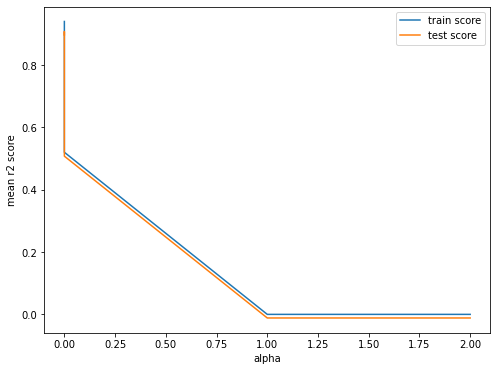

In [68]:
lasso_res['param_alpha'] = lasso_res['param_alpha'].astype('int32')
# Train
plt.figure(figsize=(8,6))
plt.plot(lasso_res['param_alpha'], lasso_res['mean_train_score'])
# Test
plt.plot(lasso_res['param_alpha'], lasso_res['mean_test_score'])

plt.legend(['train score', 'test score'])
plt.xlabel('alpha')
plt.ylabel('mean r2 score')
plt.show()

From the above graph we can observe that for train data as alpha increases r2 score decreases.But at 0.002 (very close to 0) the train data was accuracy was high.

For test data also we can observe same results. At 0,002 the test data accuracy was high and after 0.002 alpha increases r2 score decreases.
So we will choose optimal alpha as 0.002


In [69]:
model_lasso = Lasso(0.002)
model_lasso.fit(X_train, y_train)


Lasso(alpha=0.002)

#### Model evaluation Lasso Regression 

In [70]:
#on train data
y_train_pred = model_lasso.predict(X_train)
print(metrics.r2_score(y_true = y_train, y_pred = y_train_pred))

0.8467040270158379


In [71]:
#on test data
y_test_pred = model_lasso.predict(X_test)
print(metrics.r2_score(y_true = y_test, y_pred = y_test_pred))

0.8318682696079184


The R2 values for Train and Test matches well

In [72]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.05736621447361267


In [73]:
MSE = np.square(np.subtract(y_test, y_test_pred)).mean()
MSE

0.0032908825630325314

In [74]:
#Model parameters
# Coefficients list
model_lasso_parameters = list(model_lasso.coef_)
# Inserting Y Intercept to model parameters list
model_lasso_parameters.insert(0, model_lasso.intercept_)
# Rounding off the coefficients
model_lasso_parameters = [round(i,3) for i in model_lasso_parameters]

cols = X_train.columns
cols = cols.insert(0,'constant')
lasso_param_list = list(zip(cols, model_lasso_parameters))
lasso_param_list

[('constant', 0.071),
 ('MSSubClass', -0.007),
 ('LotFrontage', 0.0),
 ('LotArea', 0.027),
 ('OverallQual', 0.115),
 ('OverallCond', 0.0),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', 0.06),
 ('BsmtFinSF2', 0.0),
 ('TotalBsmtSF', 0.044),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -0.0),
 ('GrLivArea', 0.169),
 ('BsmtFullBath', 0.0),
 ('BsmtHalfBath', -0.0),
 ('FullBath', 0.0),
 ('HalfBath', 0.0),
 ('BedroomAbvGr', -0.0),
 ('KitchenAbvGr', -0.0),
 ('TotRmsAbvGrd', 0.0),
 ('Fireplaces', 0.0),
 ('GarageArea', 0.03),
 ('WoodDeckSF', 0.0),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', -0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.0),
 ('PoolArea', 0.0),
 ('MiscVal', 0.0),
 ('Age_House', -0.0),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', -0.0),
 ('MSZoning_RL', 0.0),
 ('MSZoning_RM', -0.014),
 ('LotShape_IR2', 0.0),
 ('LotShape_IR3', -0.0),
 ('LotShape_Reg', -0.002),
 ('LotConfig_CulDSac', 0.0),
 ('LotConfig_FR2', 0.0),
 ('LotConfig_FR3', -0.0),
 ('LotConfig_Inside', -0.0),
 ('Neighborhood_

In [75]:
lasso_params_df = pd.DataFrame({'Params':cols, 'Coef':model_lasso_parameters})
lasso_params_df = lasso_params_df.loc[lasso_params_df['Coef'] != 0]
lasso_params_df

,Params,Coef
0,constant,0.071
1,MSSubClass,-0.007
3,LotArea,0.027
4,OverallQual,0.115
7,BsmtFinSF1,0.060
9,TotalBsmtSF,0.044
13,GrLivArea,0.169
22,GarageArea,0.030
34,MSZoning_RM,-0.014
37,LotShape_Reg,-0.002


In [76]:
# Sorting the parameters with their Coefficient values
lasso_params_df.sort_values('Coef',ascending=False).head(10)

,Params,Coef
13,GrLivArea,0.169
4,OverallQual,0.115
0,constant,0.071
7,BsmtFinSF1,0.060
9,TotalBsmtSF,0.044
57,Neighborhood_NridgHt,0.032
22,GarageArea,0.030
169,SaleCondition_Partial,0.029
3,LotArea,0.027
135,BsmtFinType1_GLQ,0.021


### Observations 

Ridge regression model:

    Train r2 score:0.9338573956978723

    Test r2 score:0.9168089469736156

Lasso regression Model:

    Train r2 score:0.8467040270158379

    Test r2 score:0.8318682696079184
    

We can observe that performance of the ridge regression model is good than lasso regression model based on r2 values of train and test data.

But it is good to with Lasso, it tends the coefficients to be zero or near values to zero.

The variables which are mainly effecting the price of the house:

    GrLivArea	
    OverallQual
    GarageArea
Above varibles are helping to increase saleprice.

    Age_House
Above varibles are effecting to decrease saleprice.